Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df.shape)
df.info()

(500, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Cleaning up the data 

In [2]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df = df.drop(['Serial No.'], axis=1)
df.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [5]:
renamed_cols = {
    "GRE Score":"gre",
    "TOEFL Score":"toefl",
    "University Rating": "rating",
    "SOP":"sop",
    "LOR":"lor",
    "CGPA": "gpa",
    "Research": "research",
    "Chance of Admit ": "a_chance"
}
df.rename(columns = renamed_cols, inplace=True)
df.sample()

,gre,toefl,rating,sop,LOR,gpa,research,a_chance
341,326,110,3,3.5,3.5,8.76,1,0.79


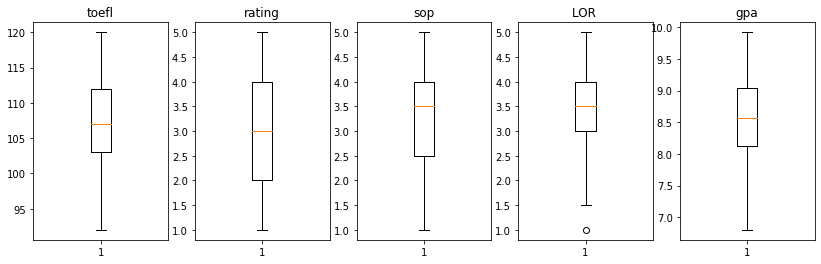

,gre,toefl,rating,sop,LOR,gpa,research,a_chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
plt.figure(1,figsize=(14,4))
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
plt.show()
df.describe()

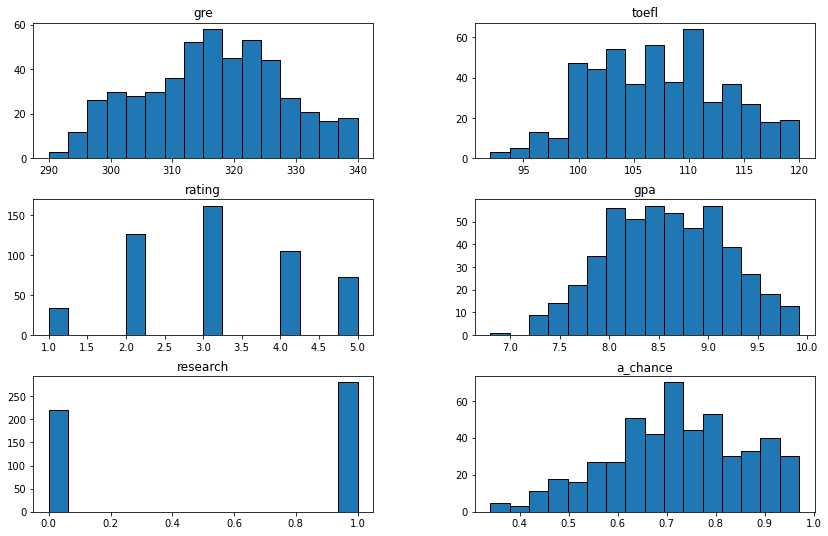

In [7]:
df[['gre','toefl','rating','gpa','research','a_chance']].hist(
    figsize=(14,9), 
    bins=16,
    linewidth='1', 
    edgecolor='k',
    grid=False
    )
plt.show()

# Correlation with change of acceptance - a_chance.

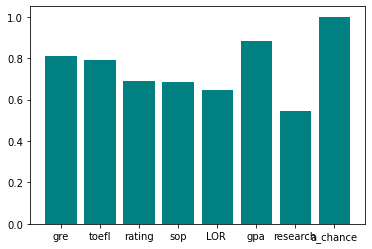

gre         0.810351
toefl       0.792228
rating      0.690132
sop         0.684137
LOR         0.645365
gpa         0.882413
research    0.545871
a_chance    1.000000
Name: a_chance, dtype: float64


In [10]:
correlation = df.corr().a_chance
plt.bar(df.columns, correlation, color="teal")
plt.show()
print(correlaction)


# Relations between GRE/TOEFL and GPA/GRE

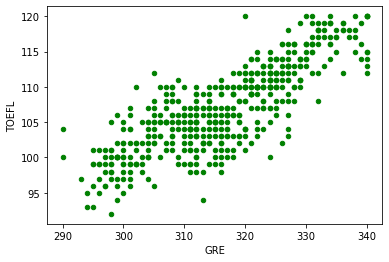

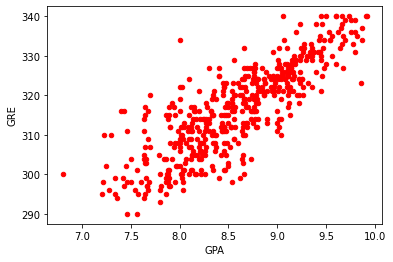

In [12]:
df.plot(
    kind='scatter',
    x ='gre',
    y ='toefl',
    color ="green"
)
plt.xlabel("GRE")
plt.ylabel("TOEFL")
plt.show()


df.plot(
    kind='scatter',
    x='gpa',
    y='gre',
    color="red"
)
plt.xlabel("GPA")
plt.ylabel("GRE")
plt.show()

Correlations look strong, it is very likely that if someone scored high on either of them would score high on another one also.

# Relation between admission chane and other features.

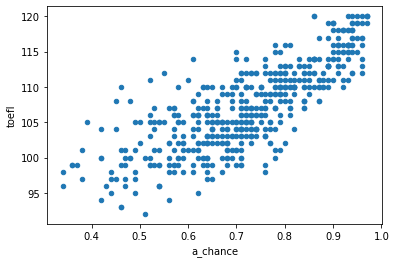

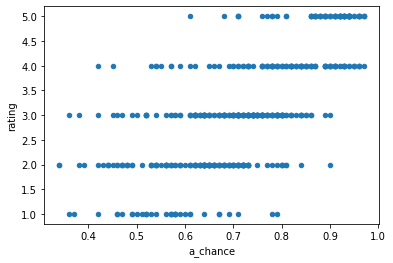

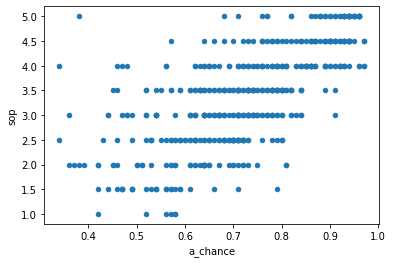

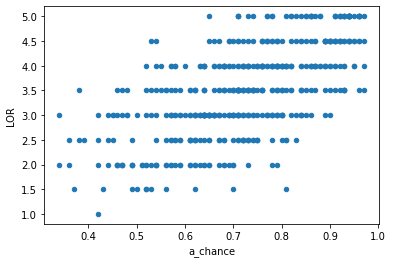

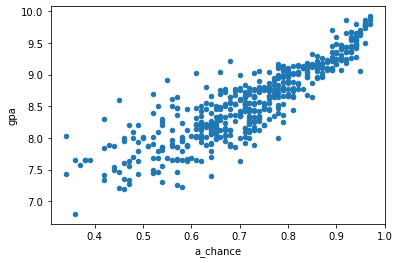

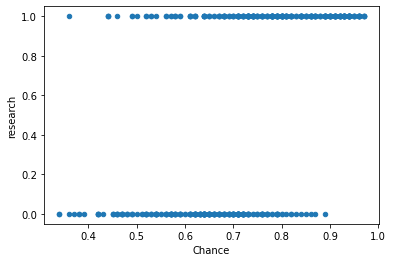

In [14]:
for i in range(1,7):
    df.plot(
        kind='scatter',
        x='a_chance',
        y=df.columns[i]
    )
plt.xlabel("Chance")
plt.ylabel(df.columns[i])
plt.show()

No surprise here  the higher your score, then greater the chacne for admission.